In [3]:
from scipy.spatial.distance import pdist
%matplotlib inline

import pandas as pd
import geopandas
import numpy as np 
import pandas as pd 

In [4]:

block_grp = geopandas.read_file("2018NYblockgrpSF/tl_2018_36_bg.shp")
block_grp = block_grp.rename(columns={'TRACTCE': 'Tract', 'BLKGRPCE': 'Block'})
erie_county_blockGrp = block_grp[(block_grp.COUNTYFP == "029")]
erie_county_blockGrp.head()
                                   

,STATEFP,COUNTYFP,Tract,Block,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
11,36,029,014603,2,360290146032,Block Group 2,G5030,S,1992416,0,+42.9837512,-078.6869747,"POLYGON ((-78.69695 42.98929, -78.69562 42.989..."
12,36,029,014601,2,360290146012,Block Group 2,G5030,S,2237921,0,+42.9608352,-078.6827714,"POLYGON ((-78.69695 42.95930, -78.69688 42.962..."
13,36,029,014601,4,360290146014,Block Group 4,G5030,S,2362636,0,+42.9716503,-078.6869950,"POLYGON ((-78.69693 42.97632, -78.69687 42.976..."
14,36,029,014601,3,360290146013,Block Group 3,G5030,S,1790691,0,+42.9714220,-078.6691991,"POLYGON ((-78.67719 42.96713, -78.67717 42.968..."
15,36,029,014603,3,360290146033,Block Group 3,G5030,S,2185747,0,+42.9806768,-078.6542591,"POLYGON ((-78.66214 42.97657, -78.66212 42.977..."


In [5]:
buffalo_tracts = pd.read_csv("2018NYblockgrpSF/Tracts_data.csv")
buffalo_tracts['TRACT'] = buffalo_tracts['TRACT'].apply(lambda x: str(x).zfill(6))
buffalo = erie_county_blockGrp.loc[erie_county_blockGrp.Tract.isin(list(buffalo_tracts['TRACT']))]
buffalo.index

Int64Index([   74,    75,    76,   817,   835,   838,   839,   840,   841,
              842,
            ...
            12641, 12642, 12643, 12709, 12710, 12711, 13523, 13524, 13525,
            13526],
           dtype='int64', length=287)

In [6]:

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a)) # this is in km

In [7]:
buffalo.to_csv("buffalo_geometry.csv")

In [8]:
buffalo2 = buffalo[['INTPTLAT','INTPTLON']].astype('float64')
df = []
#haversine(buffalo.iloc[2:]['INTPTLAT'],buffalo.iloc[2:]['INTPTLON'],buffalo.iloc[2:]['INTPTLAT'],buffalo.iloc[2:]['INTPTLON'])
for x in range(0,287):
    for i in range(x+1,287):
        df.append(haversine(buffalo2.iloc[x]['INTPTLAT'],buffalo2.iloc[x]['INTPTLON'],buffalo2.iloc[i]['INTPTLAT'],buffalo2.iloc[i]['INTPTLON']))
        


In [9]:
buffalo['unique'] = buffalo['Tract'] + buffalo['Block']
buffalo

C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STATEFP,COUNTYFP,Tract,Block,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,unique
74,36,029,016800,2,360290168002,Block Group 2,G5030,S,418211,0,+42.9087575,-078.8646381,"POLYGON ((-78.86818 42.90460, -78.86817 42.904...",0168002
75,36,029,016800,1,360290168001,Block Group 1,G5030,S,465466,0,+42.9068994,-078.8581310,"POLYGON ((-78.86255 42.90486, -78.86253 42.905...",0168001
76,36,029,016800,4,360290168004,Block Group 4,G5030,S,408133,0,+42.9125673,-078.8583172,"POLYGON ((-78.86244 42.90997, -78.86244 42.910...",0168004
817,36,029,006602,1,360290066021,Block Group 1,G5030,S,155932,0,+42.9143061,-078.8732873,"POLYGON ((-78.87706 42.91411, -78.87705 42.915...",0066021
835,36,029,016900,4,360290169004,Block Group 4,G5030,S,188964,0,+42.9217360,-078.8645317,"POLYGON ((-78.87063 42.92298, -78.86978 42.923...",0169004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12711,36,029,002800,3,360290028003,Block Group 3,G5030,S,113925,0,+42.8983741,-078.8162956,"POLYGON ((-78.81811 42.90052, -78.81695 42.900...",0028003
13523,36,029,016300,1,360290163001,Block Group 1,G5030,S,873936,0,+42.8739333,-078.8382098,"POLYGON ((-78.84525 42.87077, -78.84522 42.870...",0163001
13524,36,029,016700,3,360290167003,Block Group 3,G5030,S,1544415,0,+42.8788022,-078.8088326,"POLYGON ((-78.81998 42.87206, -78.81815 42.874...",0167003
13525,36,029,016400,4,360290164004,Block Group 4,G5030,S,657483,0,+42.8777726,-078.8628328,"POLYGON ((-78.87052 42.87688, -78.87050 42.876...",0164004


In [10]:
buffalo[['unique','INTPTLAT','INTPTLON']]

,unique,INTPTLAT,INTPTLON
74,0168002,+42.9087575,-078.8646381
75,0168001,+42.9068994,-078.8581310
76,0168004,+42.9125673,-078.8583172
817,0066021,+42.9143061,-078.8732873
835,0169004,+42.9217360,-078.8645317
...,...,...,...
12711,0028003,+42.8983741,-078.8162956
13523,0163001,+42.8739333,-078.8382098
13524,0167003,+42.8788022,-078.8088326
13525,0164004,+42.8777726,-078.8628328


In [11]:
from scipy.spatial.distance import squareform
new_df  = pd.DataFrame(squareform(df), columns = buffalo['unique'], index = buffalo['unique'])

In [12]:
heat_map = new_df * 0.621371 # conversion into miles 
heat_map

unique,0168002,0168001,0168004,0066021,0169004,0065011,0065013,0065014,0169003,0169001,...,0001102,0061002,0061003,0166002,0166001,0028003,0163001,0167003,0164004,0164003
unique,,,,,,,,,,,,,,,,,,,,,
0168002,0.000000,0.353448,0.414255,0.581845,0.896744,0.950546,1.183889,1.286752,0.657730,0.836005,...,4.943591,1.433943,1.460014,1.329824,1.480031,2.549671,2.753032,3.501896,2.142799,2.391345
0168001,0.353448,0.000000,0.391727,0.922041,1.075060,1.287772,1.532640,1.637712,0.856704,1.126493,...,4.750107,1.784273,1.812027,0.977673,1.157254,2.197766,2.490993,3.161664,2.026492,2.185574
0168004,0.414255,0.391727,0.000000,0.766996,0.707246,1.093905,1.373328,1.489729,0.515106,0.853207,...,5.137626,1.627481,1.731227,1.213962,1.479176,2.341895,2.856816,3.422943,2.414922,2.572987
0066021,0.581845,0.922041,0.766996,0.000000,0.678090,0.368748,0.616808,0.728665,0.506786,0.361196,...,5.429643,0.871273,0.968998,1.896483,2.061789,3.087193,3.306648,4.081836,2.579092,2.905785
0169004,0.896744,1.075060,0.707246,0.678090,0.000000,0.762819,1.045496,1.163652,0.239692,0.422174,...,5.817843,1.263252,1.499789,1.893836,2.184510,2.926437,3.561434,4.092341,3.038793,3.255391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0028003,2.549671,2.197766,2.341895,3.087193,2.926437,3.432919,3.703576,3.815613,2.816441,3.186840,...,4.284149,3.958286,4.009599,1.254937,1.382447,0.000000,2.020516,1.404071,2.752510,2.317945
0163001,2.753032,2.490993,2.856816,3.306648,3.561434,3.663882,3.831937,3.904750,3.347677,3.588815,...,2.404833,4.049012,3.918909,1.838479,1.429416,2.020516,0.000000,1.525029,1.274660,0.619651
0167003,3.501896,3.161664,3.422943,4.081836,4.092341,4.449047,4.683335,4.781147,3.934691,4.267937,...,3.200423,4.929466,4.895134,2.209074,2.036664,1.404071,1.525029,0.000000,2.735043,2.103561


In [13]:
buffalo[['unique','INTPTLAT','INTPTLON']]

,unique,INTPTLAT,INTPTLON
74,0168002,+42.9087575,-078.8646381
75,0168001,+42.9068994,-078.8581310
76,0168004,+42.9125673,-078.8583172
817,0066021,+42.9143061,-078.8732873
835,0169004,+42.9217360,-078.8645317
...,...,...,...
12711,0028003,+42.8983741,-078.8162956
13523,0163001,+42.8739333,-078.8382098
13524,0167003,+42.8788022,-078.8088326
13525,0164004,+42.8777726,-078.8628328


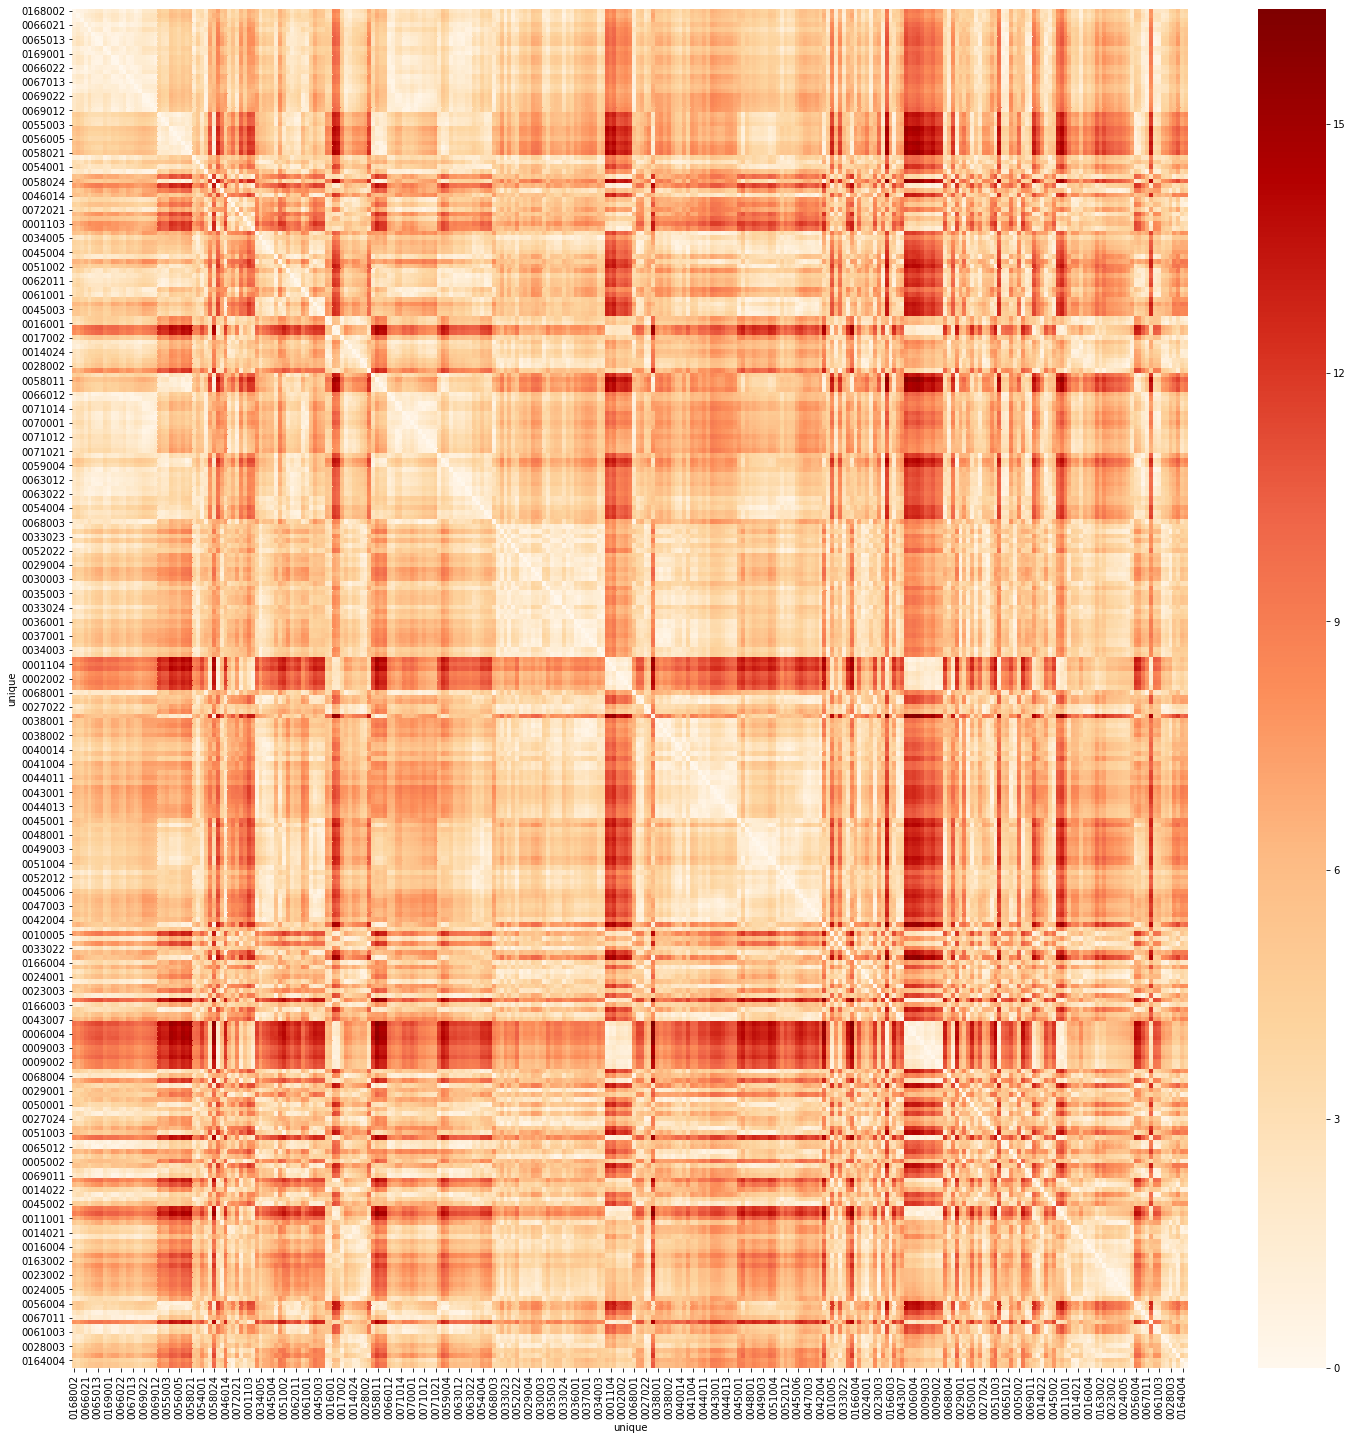

In [61]:
from matplotlib import pyplot
import seaborn


a4_dims = (25, 25)

fig, ax = pyplot.subplots(figsize=a4_dims)

sns.heatmap(ax = ax,data=new_df, cmap= 'OrRd')

In [15]:
new_df.to_csv('distances.csv')

In [21]:
len(new_df)

287

In [22]:
elicott_data = pd.read_csv("Gentrification_data/erie_county-2018.csv")
buffalo_data = elicott_data.loc[elicott_data.tract.isin(list(buffalo_tracts['TRACT']))]
buffalo_data

,Total Median Housing values (DOLLARS),state,county,tract,block group,Total Median contract rent (DOLLARS),Total Population 25 years and older that have less than a college education,Total Population that is 25 years and older,Total Median Gross Rent As A Percentage Of Household Income In The Past 12 Months (Dollars),Total below povery line (population whose poverty level is determined),...,Total Number of Vacant Housing Units,Total Number of Housing Units,Total Number of Owner per housing unit,Total Number of Renter per housing unit,Total Number of Occupied Housing Units,Total number of person(only Hisapnic),Total number of person(only White),Total number of person(only Black or African American),Total population,Year
5,49600,36,29,5802,1,642,357,490,51.0,329,...,39,396,52,305,357,165,446,137,693,2018
6,60100,36,29,5802,2,560,571,952,32.6,758,...,121,682,195,366,561,427,650,283,1551,2018
7,60000,36,29,5802,3,599,186,367,43.6,228,...,23,293,84,186,270,0,210,181,597,2018
8,57800,36,29,5802,4,506,650,921,29.9,418,...,71,561,325,165,490,106,666,0,1656,2018
9,-666666666,36,29,6201,1,-666666666,0,46,-666666666.0,0,...,0,0,0,0,0,345,557,1101,2095,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,-666666666,36,29,1402,2,289,232,337,31.5,291,...,137,467,9,321,330,75,75,321,396,2018
763,89200,36,29,2502,2,563,263,764,51.0,261,...,76,583,314,193,507,4,52,1046,1128,2018
776,96700,36,29,4700,5,687,318,567,51.0,774,...,255,740,81,404,485,78,439,726,1356,2018
777,49200,36,29,5600,4,574,556,794,24.5,399,...,126,613,109,378,487,363,525,616,1336,2018


In [46]:
aa_df = buffalo_data['Total number of person(only Black or African American)']
np_aa = np.array(aa_df)
np_aa

array([ 137,  283,  181,    0, 1101,   82,  222,  434,    9,  168,   68,
        104,  655,   91,  657,  549,  311,  789,   59,    0,   45,  159,
        177,  140,  313,  149,  261,   26,  667,   36,  133,   14,  225,
         88,  101,  316,  460,  611,  350,  428,  397,  921, 1271, 1078,
        555,  828, 1486,  697,  725, 1462,  662,  908,  716,  202,  228,
        201,  110,   87,    0,   22,    1,  902, 1229,  179,    0,   29,
        110,  198,    1,  311,    0,    0,  154,   10,  324,  407,  452,
        321,  465,  229,  762,  824,  974,  154,  286,   98,  136,    7,
        170,  154,  287,  438,  120,  426,   57,  222,  193,  622,  555,
       1113,   46,   63,  131, 1108, 1271,  245,   79,  134,  546,  255,
       1009,  146,  116,  259,  183,    0,   15,  186,    0,   46,  951,
        332,   97,   80,  230,    0,    0,   61,  856,  687,  748,  588,
          8,   17,  399,  354,  113, 1090,  167,  391,  608,  532,  701,
        364, 1233,  865,  546,  536,  520,  367,  1

In [48]:
distances= np.array(new_df)

In [59]:
np.dot(distances,np_aa)

array([390420.94625054, 385560.58922246, 379880.24441043, 403854.92686807,
       392105.49378214, 420864.04054416, 441995.64825125, 451969.9144557 ,
       388642.10353308, 404362.30086968, 445381.71729876, 440080.67950859,
       405014.4132531 , 391595.29860792, 441777.44839218, 420975.9276546 ,
       399261.61547149, 416203.96668638, 476906.85919256, 473303.04106372,
       474404.77587276, 469022.86897115, 550498.28985056, 525334.8229859 ,
       536582.5963741 , 619992.29327518, 600786.3957955 , 559544.37442403,
       639513.56636532, 629227.09462982, 664162.67391614, 380371.11479859,
       406801.15553315, 453547.71046509, 453427.15232568, 592460.69426823,
       674812.60856729, 709738.46018486, 533854.54304642, 552356.99530297,
       493020.85068918, 538832.19821725, 538558.11423145, 611919.7166047 ,
       600350.16992883, 727782.44237339, 644063.83924963, 530021.5223276 ,
       390674.60255233, 443295.36175597, 435066.88812708, 464524.91995508,
       476765.37675955, 6

In [53]:
buffalo_data['tract']

5      5802
6      5802
7      5802
8      5802
9      6201
       ... 
762    1402
763    2502
776    4700
777    5600
778    2300
Name: tract, Length: 287, dtype: int64

In [54]:
new_df.index

Index(['0168002', '0168001', '0168004', '0066021', '0169004', '0065011',
       '0065013', '0065014', '0169003', '0169001',
       ...
       '0001102', '0061002', '0061003', '0166002', '0166001', '0028003',
       '0163001', '0167003', '0164004', '0164003'],
      dtype='object', name='unique', length=287)